In [49]:
import numpy as np
import matplotlib.pyplot as plt
import torch

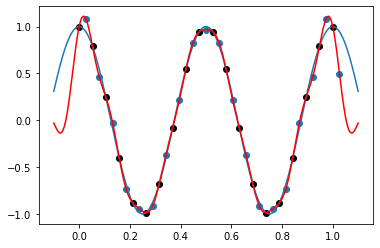

In [67]:
# sincx interpolation
def sinc_interp(x, s, u):
    if len(x) != len(s):
        raise ValueError('x and s must be the same length')
    
    # Find the period    
    T = s[1] - s[0]
    
    sincM = np.tile(u, (len(s), 1)) - np.tile(s[:, np.newaxis], (1, len(u)))
    y = np.dot(x, np.sinc(sincM/T))
    return y

def translate_with_inter(s, u, y, tau):
    s_trans = s + tau
    sig_trans = np.zeros(len(s))
    for i, s_val in enumerate(s_trans):
        idx = np.argmin((u - s_val)**2)
        sig_trans[i] = y[idx]
    return s_trans, sig_trans


N = 20
num_grid_points = 1000
t = np.linspace(-0.1,1.1, num_grid_points)
t_sampled = np.linspace(0, 1, N)
tst_signal = np.cos(4*np.pi*t)
tst_signal_samps = np.cos(4*np.pi*t_sampled)
y = sinc_interp(tst_signal_samps, t_sampled, t)

T = t_sampled[1] - t_sampled[0]
tau = T / 2
t_sampled_trans_left = tau + t_sampled
t_sampled_trans_right = tau - t_sampled

t_right, y_right = translate_with_inter(t_sampled, t, y, tau)
t_left, y_left = translate_with_inter(t_sampled, t, y, -tau)

plt.plot(t, tst_signal)
plt.plot(t, y, color = 'red')
plt.scatter(t_sampled, tst_signal_samps, color = 'black')
#plt.scatter(t_left, y_left)
plt.scatter(t_right, y_right)
plt.show()
plt.close()